In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\HTCM\\Jupyter'

In [3]:
os.chdir('E:\\Machine_Learning\\Class_4')

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('Height-Weight Data.csv')

In [6]:
df.tail()

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [7]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

In [8]:
import matplotlib.pyplot as plt

In [9]:
import numpy as np

Text(0, 0.5, 'Weight')

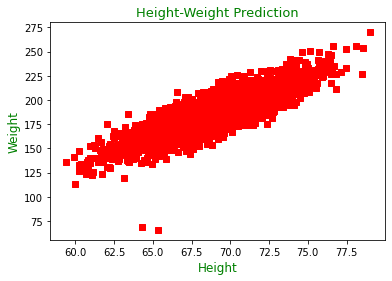

In [10]:
plt.scatter(df.Height,df.Weight,color="red",marker=',')
plt.title('Height-Weight Prediction',color='green',fontsize=13)
plt.xlabel('Height',color='green',fontsize=12)
plt.ylabel('Weight',color='green',fontsize=12)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x=df[['Height']]
y=df['Weight']

In [13]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=.8)

In [14]:
xtrain.shape

(2800, 1)

In [15]:
ytrain.shape

(2800,)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
reg= LinearRegression()

In [18]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [19]:
df['output']=reg.predict(x)

In [20]:
df.head(20)

,Height,Weight,output
0,73.847017,241.893563,215.479932
1,68.781904,162.310473,185.416629
2,74.110105,212.740856,217.041458
3,71.730978,220.042470,202.920467
4,69.881796,206.349801,191.944890
5,67.253016,152.212156,176.342116
6,68.785081,183.927889,185.435487
7,68.348516,167.971111,182.844309
8,67.018950,175.929440,174.952848
9,63.456494,156.399676,153.808367


In [21]:
reg.coef_

array([5.93536674])

In [22]:
reg.intercept_

-222.82919672853666

In [23]:
reg.predict([[55]])

array([103.61597388])

Text(0, 0.5, 'Weight')

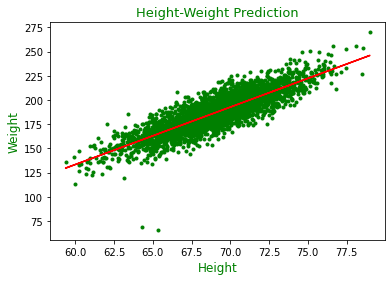

In [24]:
plt.plot(df.Height,df.output,color='red')
plt.scatter(df.Height,df.Weight,color="green",marker='.')
plt.title('Height-Weight Prediction',color='green',fontsize=13)
plt.xlabel('Height',color='green',fontsize=12)
plt.ylabel('Weight',color='green',fontsize=12)

In [25]:
reg.score(xtest,ytest)

0.7350574394754954

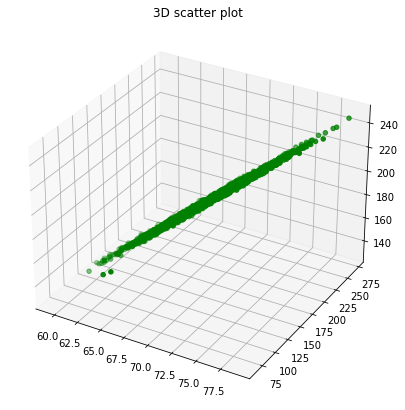

In [26]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

x = df.Height
y = df.Weight
z =df.output
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(x, y, z, color = "green")
plt.title("3D scatter plot")
plt.show()

In [38]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
pred = reg.predict(xtest) # ytest -> y
MAE = mean_absolute_error(ytest,pred)
MSE = mean_squared_error(ytest,pred)


In [39]:
MSE


110.07554258802496

In [40]:
MAE

8.079055025490073

In [42]:
import pickle as pk
# write file
pk.dump(reg,open('MY_LR1','wb')) #wb write binary

In [43]:
reg2 = pk.load(open('MY_LR1','rb')) #read binary
reg2.predict([[6000]])

array([35389.37123367])

In [45]:
# Joblib
import joblib as jb
jb.dump(reg,'ML_Model_2') #WRITE
reg3 = jb.load('ML_Model_2') #READ
reg3.predict([[6000]])

array([35389.37123367])